In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= yf.download(['PG'], period='10Y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns=np.log(1+data.pct_change())

#  St = St-1 . e^((r-1/2.stdev^2). &t + stdev.(&t^1/2.Zt))

In [4]:
r= 0.039 

In [5]:
stdev=log_returns.std()*250**0.5
stdev

0.18280697467628973

In [6]:
type(stdev)

float

In [7]:
stdev = pd.Series(stdev)

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev=stdev.values
stdev

array([0.18280697])

In [11]:
T= 1.0
t_intervals= 250
delta_t= T/t_intervals

iterations = 10000


In [14]:
z=np.random.standard_normal((t_intervals+1,iterations))
s= np.zeros_like(z)
s0=data.iloc[-1]
s[0]=s0

In [15]:
for t in range(1,t_intervals+1):
    s[t]=s[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*z[t])

In [16]:
s

array([[151.05000305, 151.05000305, 151.05000305, ..., 151.05000305,
        151.05000305, 151.05000305],
       [154.04686057, 151.45696574, 153.03610294, ..., 154.01216038,
        150.02720074, 149.50291884],
       [154.58283134, 152.51621634, 155.38628905, ..., 153.4436863 ,
        151.37688923, 148.47769944],
       ...,
       [164.95447144, 146.50786207, 145.10342542, ..., 134.64037625,
        134.5426349 , 135.5326489 ],
       [167.03940643, 145.03959126, 145.49844888, ..., 134.09710025,
        135.41377058, 134.78020898],
       [167.27258789, 148.12194715, 148.62857433, ..., 134.49746   ,
        135.16953759, 135.67998816]])

In [17]:
s.shape

(251, 10000)

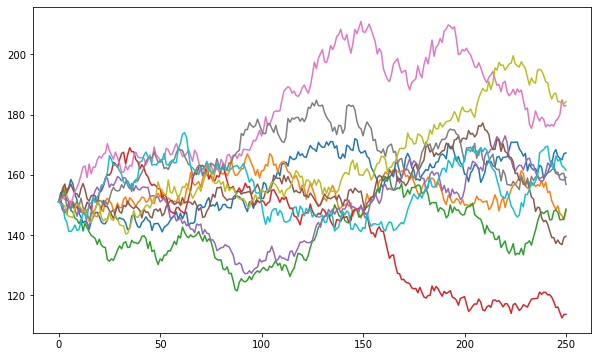

In [20]:
plt.figure(figsize=(10,6))
plt.plot(s[:,:10])

# call option payoff calculation

In [21]:
payoff=np.maximum(s[-1]-110,0)

In [22]:
payoff

array([57.27258789, 38.12194715, 38.62857433, ..., 24.49746   ,
       25.16953759, 25.67998816])

In [23]:
payoff.shape

(10000,)

formula to average the discount:

C= (e^-rt.sumpi)/iterations

In [24]:
c=np.exp(-r*T)*np.sum(payoff/iterations)

In [25]:
c

45.12638233596676

c is the price of call option